## Data
In this notebook, we will go through several methods to load image data in Tensorflow for training, evaluation and prediction.
The MNIST database of handwritten digits, one of the most widely used datasets for machine learning research is used. It is a collection of images that are commonly used to train machine learning and computer vision algorithms. The MNIST dataset contains 70,000 28*28 images for  handwritten digits from 0 to 9. 60000 for training and 10000 for testing.
![resources/MnistExamples.png](resources/MnistExamples.png)
<sub>Source: https://en.wikipedia.org/wiki/MNIST_database</sub>

tf.keras has provided built-in methods to download and load several famous datasets, including MNIST. Then we will learn how to use tf.data.Dataset to packing images and labels together. tf.data.Dataset is the best way to stream training data from disk. Datasets are iterables (not iterators), and work just like other Python iterables in Eager mode. 

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
print(tf.__version__)
%matplotlib inline

2.3.0


In [2]:
def show_images(dataset, class_names, predicts=None):
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.8, wspace=0.4)
    for i, (image, label) in enumerate(dataset):
        if i>= 9: 
            break
        if image.shape[-1] == 1:
            revised_image = np.squeeze(image)
        else:
            revised_image = image
        axes.flat[i].imshow(revised_image)
        # Name of the true class.
        label_name = class_names[label]
        
        # Show true and predicted classes.
        if predicts is None:
            axes.flat[i].set_xlabel("True : {0}".format(label_name))
        else:
            predict_name = class_names[predicts[i]]
            axes.flat[i].set_xlabel("True: {0}\nPred: {1}".format(label_name, predict_name))
        # Remove ticks from the plot.
        axes.flat[i].set_xticks([])
        axes.flat[i].set_yticks([])
    while(i < 8):
        i += 1
        axes.flat[i].axis('off')
    plt.show()

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

<font size="5">The first method </font>: Use tensorflow.keras.datasets to load data, which can be used directly in training/evaluation/prediction.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28)   (60000,)
(10000, 28, 28)   (10000,)


In [5]:
x_train = x_train.astype('float32').reshape((-1,28,28,1))
x_test = x_test.astype('float32').reshape((-1,28,28,1))
x_train /= 255.0
x_test /= 255.0
trainDataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

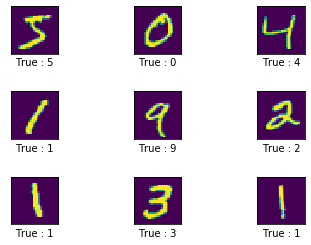

In [6]:
show_images(trainDataset, class_names)

<font size="5">The second method </font>: When you want to use some your own pictures to perform machine learning tasks.

In [7]:
import os

filenames = []
labels = []
class_names = ['bird','cat','dog']

for filename in os.listdir("./data"):
    filenames.append(os.path.join("./data",filename))
    if filename.startswith("bird"):
        labels.append(0)
    elif filename.startswith("cat"):
        labels.append(1)
    else:
        labels.append(2)
print(filenames)
print(labels)

['./data\\bird (10).jpg', './data\\bird (11).jpg', './data\\bird (12).jpg', './data\\bird (13).jpg', './data\\bird (14).jpg', './data\\bird (15).jpg', './data\\bird (16).jpg', './data\\bird (17).jpg', './data\\bird (18).jpg', './data\\bird (19).jpg', './data\\bird (2).jpg', './data\\bird (20).jpg', './data\\bird (21).jpg', './data\\bird (22).jpg', './data\\bird (23).jpg', './data\\bird (24).jpg', './data\\bird (25).jpg', './data\\bird (26).jpg', './data\\bird (27).jpg', './data\\bird (28).jpg', './data\\bird (29).jpg', './data\\bird (3).jpg', './data\\bird (30).jpg', './data\\bird (31).jpg', './data\\bird (32).jpg', './data\\bird (33).jpg', './data\\bird (34).jpg', './data\\bird (35).jpg', './data\\bird (36).jpg', './data\\bird (37).jpg', './data\\bird (38).jpg', './data\\bird (39).jpg', './data\\bird (4).jpg', './data\\bird (40).jpg', './data\\bird (5).jpg', './data\\bird (6).jpg', './data\\bird (7).jpg', './data\\bird (8).jpg', './data\\bird (9).jpg', './data\\bird.jpg', './data\\cat

In [8]:
path_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

In [9]:
for path in path_dataset:
    print(path)

(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (10).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (11).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (12).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (13).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (14).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (15).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (16).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (17).jpg'>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'./data\\bird (18).jpg'>, <tf.Tensor

In [10]:
def load_and_preprocess_image(filename, label):
    raw_image = tf.io.read_file(filename)
    image_tensor = tf.image.decode_jpeg(raw_image)
    image_tensor = tf.image.resize(image_tensor, [224, 224])
    image_tensor /= 255.0
    return image_tensor,label

In [11]:
imageDataset = path_dataset.map(load_and_preprocess_image)

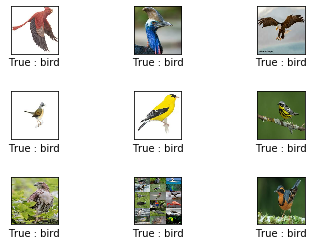

In [12]:
show_images(imageDataset, class_names)